The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [2]:
from google.colab import files
upload= files.upload()

Saving boston_housing.csv to boston_housing.csv


In [3]:
import pandas as pd
df=pd.read_csv("boston_housing.csv", index_col="Unnamed: 0")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


**Q1: For the "Median value of owner-occupied homes" provide a boxplot**

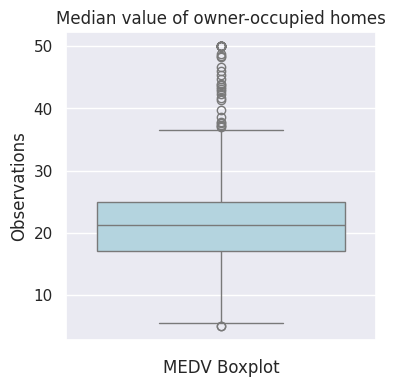

In [23]:
import seaborn as sns
from seaborn.objects import Plot as p
import matplotlib as plt

#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
sns.set_style("darkgrid")
sns.set_theme(rc={'figure.figsize':(4,4)})
fig= sns.boxplot(y=df["MEDV"], data=df,showmeans=False, showfliers=True, color="lightblue").set(title="Median value of owner-occupied homes", xlabel="MEDV Boxplot", ylabel="Observations")


The outliers are concentrated above the third quarantile of the observations.

**Q2: Provide a bar plot for the Charles river variable**

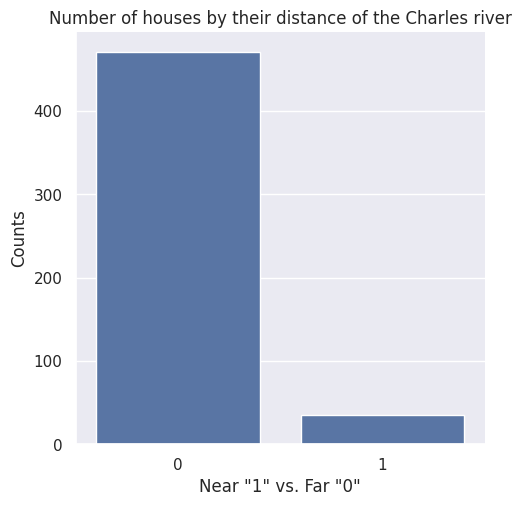

In [22]:
sns.catplot(x='CHAS', kind='count', data=df,).set(title= "Number of houses by their distance of the Charles river", xlabel= "Near \"1\" vs. Far \"0\"" , ylabel="Counts")

We can notice that the majority of the houses are far from the river.

**Q3:Provide a boxplot for the MEDV variable vs the AGE variable.
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

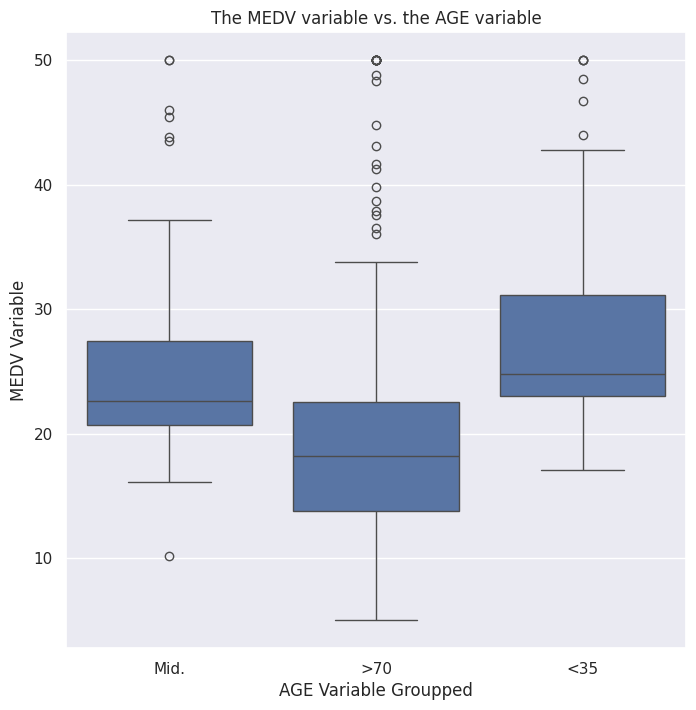

In [38]:
df.loc[(df["AGE"]<= 35), "AGE-grouped"]= "<35"
df.loc[((df["AGE"]> 35)&(df["AGE"]<= 70)), "AGE-grouped"]= "Mid."
df.loc[(df["AGE"]> 70),"AGE-grouped"]= ">70"

sns.set_theme(rc={'figure.figsize':(8,8)})

fig = sns.boxplot(y=df["MEDV"], x=df["AGE-grouped"], data=df).set(title="The MEDV variable vs. the AGE variable", xlabel="AGE Variable Groupped", ylabel="MEDV Variable")

We can notice that the higher median values are associated with the group under 35.

**Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
 What can you say about the relationship?**

Text(0.5, 1.0, 'The correlation between Nitric oxide concentrations "NOX" \nand The proportion of non-retail business acres per town"INDUS"')

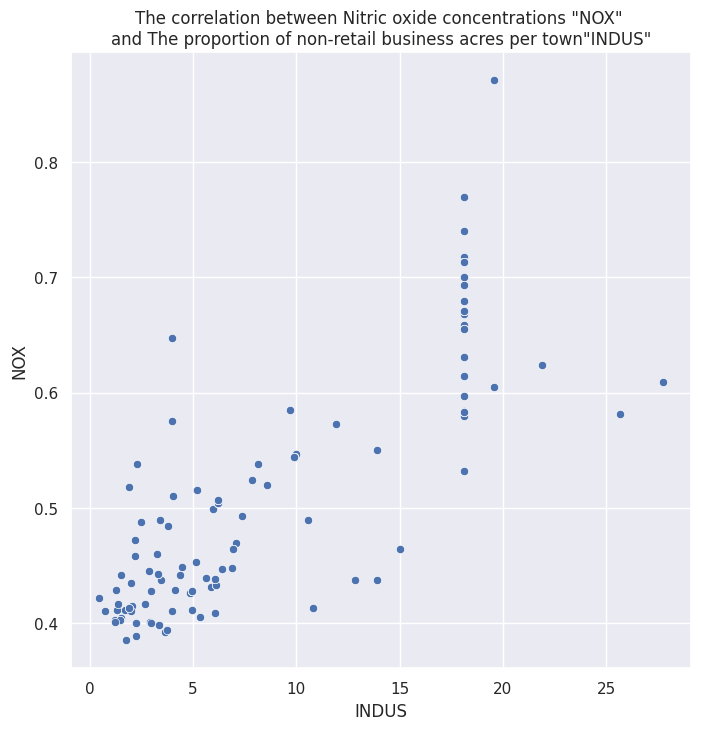

In [40]:
fig = sns.scatterplot(x='INDUS', y='NOX', data=df,)
figsize=(15,15)
fig.set_title("The correlation between Nitric oxide concentrations \"NOX\" \nand The proportion of non-retail business acres per town\"INDUS\"")

We can notice a positive correlation between the two variables.

**Q5: Create a histogram for the pupil to teacher ratio variable**

[Text(0.5, 1.0, 'Pupil to Teacher Ratio')]

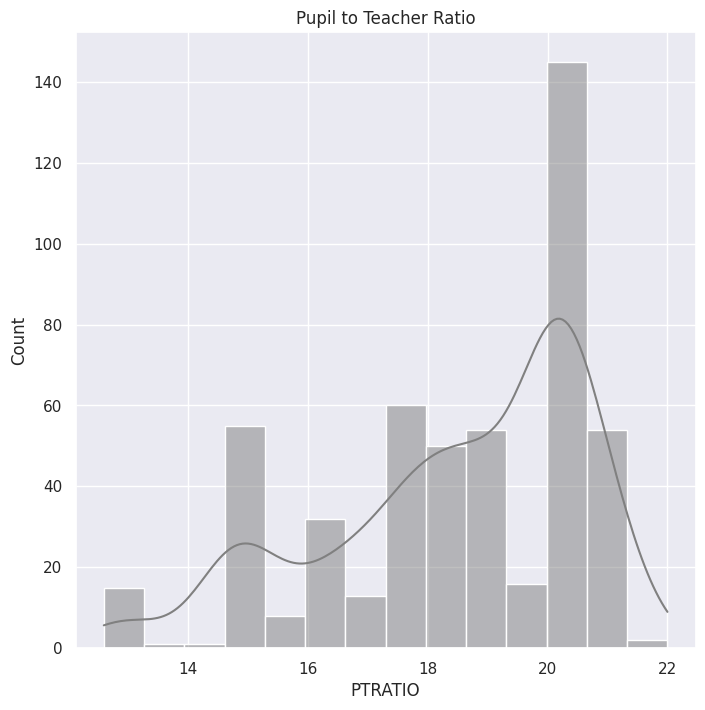

In [42]:
figsize=(15,15)
sns.histplot(df["PTRATIO"], color='gray', kde=True,).set(title="Pupil to Teacher Ratio")


The values lean towards right, the distribution is right skewed.

**Q6:Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

We are looking for a significant difference, between two independent samples, so we use the two tailed t test for independent samples

H0: the two means are equal mean0=mean1

H1: the two means are not equal mean1 != mean0

but first we will have to run the Leven's test for variance equality:

H0: the two variances are equal var0=var1

H1: the two variances are not equal var0 != var1


In [43]:
import scipy.stats as stats
dfchar= df[df["CHAS"]==1]["MEDV"]
dfnchar=df[df["CHAS"]==0]["MEDV"]

lv= stats.levene(dfchar, dfnchar, center= "mean")

if lv[1] < 0.05:
    print(f"Levene's test p-Value is:{lv[1]} ; it is less than 0.05 so we reject the H0 and the variances are not equal")
else:
    print(f"Levene's test p-Value is:{lv[1]} ; it is greater than 0.05 so we fail to reject the H0 and the variances are equal")

#we set the parameter of the variances to FALSE because they are not equal
tv=stats.ttest_ind(dfchar, dfnchar, equal_var="False")

if tv[1] < 0.05:
    print(f"T-test p-Value is:{tv[1]} ; it is less than 0.05 so we reject the H0 , and there is a significant difference between the two samples ")
else:
    print(f"T-test p-Value is:{tv[1]} ; it is more than 0.05 so wefail to reject the H0 , and there is no significant difference between the two samples")


Levene's test p-Value is:0.003238119367639829 ; it is less than 0.05 so we reject the H0 and the variances are not equal
T-test p-Value is:7.390623170519905e-05 ; it is less than 0.05 so we reject the H0 , and there is a significant difference between the two samples 


Levene's test p-Value is:0.003238119367639829 ; it is less than 0.05 so we reject the H0 and the variances are not equal

T-test p-Value is:7.390623170519905e-05 ; it is less than 0.05 so we reject the H0 , and there is a significant difference between the two samples


**Q7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

H0: the means of the three groups are equal mean1=mean2=mean3

H1: at least one of the means is different

In [47]:
under35= df[df["AGE-grouped"]== "<35"]["MEDV"]
mid= df[df["AGE-grouped"]== "Mid."]["MEDV"]
more70= df[df["AGE-grouped"]==">70"]["MEDV"]

anova1=stats.f_oneway(under35, mid, more70,)

if anova1[1] < 0.05:
    print(f"ANOVA-test p-Value is:{anova1[1]} ; it is less than 0.05 so we reject the H0 , at least one of the samples is different")
else:
    print(f"ANOVA-test p-Value is:{anova1[1]} ; it is more than 0.05 so wefail to reject the H0 , the means for all three samples are equal")


ANOVA-test p-Value is:1.7105011022702984e-15 ; it is less than 0.05 so we reject the H0 , at least one of the samples is different


ANOVA-test p-Value is:1.7105011022702984e-15 ; it is less than 0.05 so we reject the H0 , at least one of the samples is different

**Q8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

H0: there is no correlation between the two variables

H1: there is a correlation

In [49]:
pear= stats.pearsonr(df["INDUS"], df["NOX"])

if pear[1] < 0.05:
    print(f"Pearson-test p-Value is:{pear[1]} ; it is less than 0.05 so we reject the H0 , there is a correlation between the variables")
else:
    print(f"Pearson-test p-Value is:{pear[1]} ; it is more than 0.05 so wefail to reject the H0 , there is no a correlation between the variables")

print(f"Pearson Coefficient (r) is:{pear[0]}")

Pearson-test p-Value is:7.913361061239527e-98 ; it is less than 0.05 so we reject the H0 , there is a correlation between the variables
Pearson Coefficient (r) is:0.7636514469209151


Pearson-test p-Value is:7.913361061239527e-98 ; it is less than 0.05 so we reject the H0 , there is a correlation between the variables
Pearson Coefficient (r) is:0.7636514469209151

We can conclude that there is a strong positive correaltion between the two variables

**Q9:What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**



We use the regression model to detect how the independent variable X will impact the independent variable y

H0: b1= 0 so there is no impact of X on y

H1: b1!= 0 variable X has an impact on variable y

In [ ]:
import statsmodels.api as sm
X = df["DIS"]
y= df["MEDV"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        14:30:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the table above we can conclude that each additional weighted distance to the five Boston employment centres would have led to an increase of an 1.0916 on the median value of owner occupied homes.